In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [206]:
# Membaca dataset
data_nilai = pd.read_csv('dataset/Data Nilai Mata Kuliah Alumni Prodi Informatika Universitas Gunadarma_Ver2_Update - NilaiVer2_Update.csv')
data_profesi = pd.read_csv('dataset/Data Profil Alumni Prodi Informatika Universitas Gunadarma_Ver2.xlsx - ProfesiVer2_29092024.csv')

In [207]:
data_nilai

,ID,KDMK,NAMA MK,JENIS,SKS,NILAI
0,Alumni001,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
1,Alumni002,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
2,Alumni003,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
3,Alumni004,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
4,Alumni005,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
...,...,...,...,...,...,...
40192,Alumni506,IT000205,TERAPAN TEORI GRAF,W,2,A
40193,Alumni507,IT000205,TERAPAN TEORI GRAF,W,2,A
40194,Alumni508,IT000205,TERAPAN TEORI GRAF,W,2,A
40195,Alumni509,IT000205,TERAPAN TEORI GRAF,W,2,A


In [208]:
data_profesi

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN
0,Alumni001,3.61,2020,System Analyst
1,Alumni002,3.55,2020,Software Quality Assurance Engineer
2,Alumni003,3.30,2020,Software Engineer
3,Alumni004,3.10,2020,Data Engineer
4,Alumni005,3.26,2020,Software Engineer
...,...,...,...,...
505,Alumni506,3.70,2023,Software Quality Assurance Engineer
506,Alumni507,3.87,2023,Software Engineer
507,Alumni508,3.62,2023,Software Engineer
508,Alumni509,3.48,2023,System Analyst


In [209]:
# Remove the columns 'KDMK' and 'JENIS' from the 'nilai_alumni' dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['KDMK', 'JENIS'])

In [210]:
# Merge the two datasets based on 'ID' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi, nilai_alumni_cleaned, on='ID')

In [211]:
merged_data

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN,NAMA MK,SKS,NILAI
0,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 1,2,A
1,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 2,2,B
2,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 3,2,A
3,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PENGOLAHAN PARALEL,3,B
4,Alumni001,3.61,2020,System Analyst,ALGORITMA DEEP LEARNING,2,A
...,...,...,...,...,...,...,...
40192,Alumni510,3.70,2023,Software Quality Assurance Engineer,TEKNIK KOMPILASI,3,A
40193,Alumni510,3.70,2023,Software Quality Assurance Engineer,TEKNOLOGI GAME,1,A
40194,Alumni510,3.70,2023,Software Quality Assurance Engineer,TEKNOLOGI KECERDASAN ARTIFICIAL,2,A
40195,Alumni510,3.70,2023,Software Quality Assurance Engineer,TEORI BAHASA DAN OTOMATA,3,B


In [212]:
# To see the count of each grade
grade_counts = merged_data['NILAI'].value_counts()
grade_counts


NILAI
A    23166
B    15206
C     1705
D      120
Name: count, dtype: int64

In [213]:
# Change the data type of the 'NAMA MK' column to INDEX
merged_data['INDEX'] = merged_data['NAMA MK']

In [214]:
# show all columns
data_nilai.columns

Index(['ID', 'KDMK', 'NAMA MK', 'JENIS', 'SKS', 'NILAI'], dtype='object')

In [215]:
data_profesi.columns

Index(['ID', 'IPK', 'TAHUN LULUS', 'PROFESI PEKERJAAN'], dtype='object')

In [216]:
# Pivots the merged data table to create a table with the student's ID, IPK, PROFESI PEKERJAAN as rows, and the subject indices as columns, with the student's grades as the values.

# The `pivot_table` function is used to reshape the data from a long format to a wide format, with the subject indices as the column names and the grades as the values. The `first` aggregation function is used to handle any duplicate grades for a student in a subject.

# The resulting `pivoted_grades` DataFrame will have the student information (ID, IPK, PROFESI PEKERJAAN) as the index, and the subject grades as the columns, with 0 filled in for any subjects not taken by a student.


pivoted_grades = merged_data.pivot_table(
    index=['ID', 'IPK', 'PROFESI PEKERJAAN'], 
    columns='INDEX', 
    values='NILAI', 
    aggfunc='first'  # Take the first occurrence if there are duplicates
).reset_index()

# Merge the pivoted table back to the original data to align with the rest of the information
# This will leave 0 for subjects not taken by each student

pivoted_grades.fillna(0, inplace=True)

pivoted_grades.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [217]:
pivoted_grades

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Alumni506,3.70,Software Quality Assurance Engineer,A,B,A,B,B,A,A,...,A,A,A,B,0,A,A,A,A,A
506,Alumni507,3.87,Software Engineer,A,A,A,B,A,A,B,...,A,A,A,A,0,B,A,A,A,A
507,Alumni508,3.62,Software Engineer,A,B,A,A,A,B,B,...,B,B,B,A,0,A,A,0,B,A
508,Alumni509,3.48,System Analyst,A,B,A,A,B,B,B,...,0,B,C,B,0,C,A,A,A,A


In [218]:
# Replace NaN values with 0 for the grade columns
pivoted_grades_filled = pivoted_grades.fillna(0)

# Display the updated data with NaN replaced by 0
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [219]:
# Define the grade mapping
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

# Apply the grade mapping to all relevant columns that contain grades
# We'll apply this mapping to all columns except 'NPM', 'IPK', 'PROFESI', and 'PEKARJAAN'

# Selecting only grade columns
grade_columns = pivoted_grades_filled.columns.difference(['ID', 'IPK', 'PROFESI', 'PEKERJAAN'])

# Apply grade mapping to these columns
pivoted_grades_filled[grade_columns] = pivoted_grades_filled[grade_columns].replace(grade_mapping)


# Display the updated dataframe
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,Software Quality Assurance Engineer,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,Software Engineer,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,Software Engineer,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
5,Alumni006,3.29,IT Project Manager,3,3,4,3,4,3,3,...,4,4,3,3,0,3,4,0,3,0
6,Alumni007,3.25,Data Analyst,3,3,3,3,4,4,3,...,4,4,2,3,0,4,4,0,3,0
7,Alumni008,3.36,Network Engineer,3,3,4,3,3,4,3,...,4,3,4,3,0,3,4,0,3,0
8,Alumni009,3.67,Software Quality Assurance Engineer,2,4,4,4,4,4,3,...,4,4,3,4,0,4,4,0,3,0
9,Alumni010,3.87,Graphic Designer,4,3,4,3,4,4,4,...,4,4,4,4,0,4,4,0,4,0


In [220]:
# Get a random NPM from the data
random_id = pivoted_grades_filled['ID'].sample().values[0]

print(f"Randomly selected id: {random_id}")

# Get the data for this random NPM
random_student_data = pivoted_grades_filled[pivoted_grades_filled['ID'] == random_id]

# Display the data for the randomly selected student
random_student_data

Randomly selected id: Alumni220


INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
219,Alumni220,3.44,Software Developer,3,4,3,4,4,3,3,...,4,3,3,4,0,3,3,0,4,0


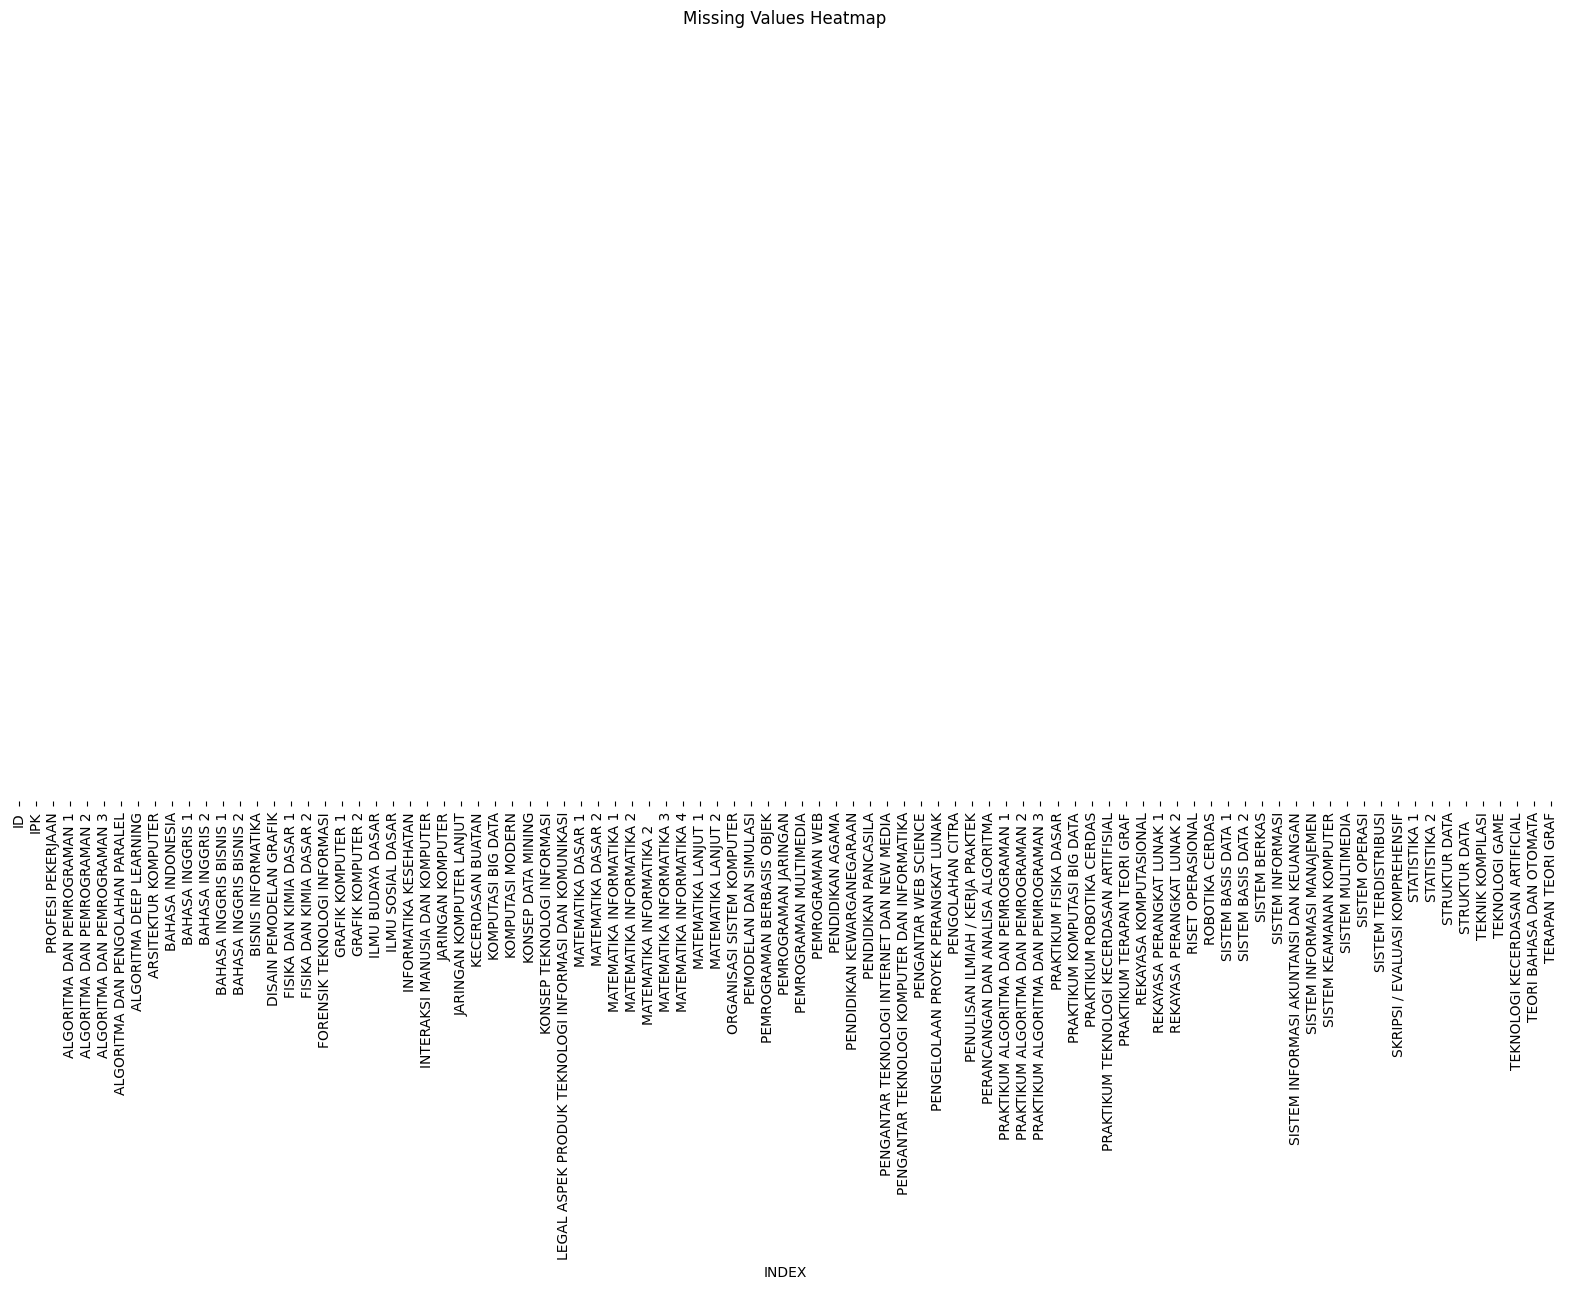

In [221]:
# Create a binary mask where 0 is True and non-zero is False
mask = pivoted_grades_filled.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(mask, cmap='binary', cbar=False, yticklabels=False)

# Set the title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

## Eksplorasi Data

In [222]:
# Step 1: Basic statistics of the numerical columns
basic_stats = pivoted_grades_filled.describe()

# Step 2: Distribution of predicted professions
profession_distribution = pivoted_grades_filled['PROFESI PEKERJAAN'].value_counts()

basic_stats

INDEX,IPK,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,BAHASA INGGRIS 1,BAHASA INGGRIS 2,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,3.538412,3.586275,3.388235,3.525490,3.405882,3.741176,3.623529,3.460784,3.390196,3.482353,...,3.858824,3.492157,3.329412,2.335294,1.182353,3.627451,3.684314,0.635294,3.376471,1.482353
std,0.227423,0.523896,0.507564,0.503755,0.582964,0.581028,0.493011,0.547751,0.644382,0.628937,...,0.410652,0.597093,0.661395,1.729022,1.697126,0.552216,0.614453,1.433643,0.563663,1.890594
min,2.820000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000
25%,3.370000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
50%,3.540000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,3.000000,3.000000,0.000000,4.000000,4.000000,0.000000,3.000000,0.000000
75%,3.710000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,4.000000,4.000000
max,3.980000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [224]:
profession_distribution

PROFESI PEKERJAAN
Software Developer                     146
Software Engineer                       90
Software Quality Assurance Engineer     76
Data Analyst                            31
System Analyst                          25
IT Project Manager                      21
Data Engineer                           17
UI/UX Designer                          16
IT Lecturer                             14
Graphic Designer                        14
Database Administrator                  13
Network Engineer                        13
Network Security Analyst                11
Data Scientist                           6
Network Security Engineer                6
IT Entrepreneur                          5
Cyber Security Analyst                   3
Product Designer                         3
Name: count, dtype: int64

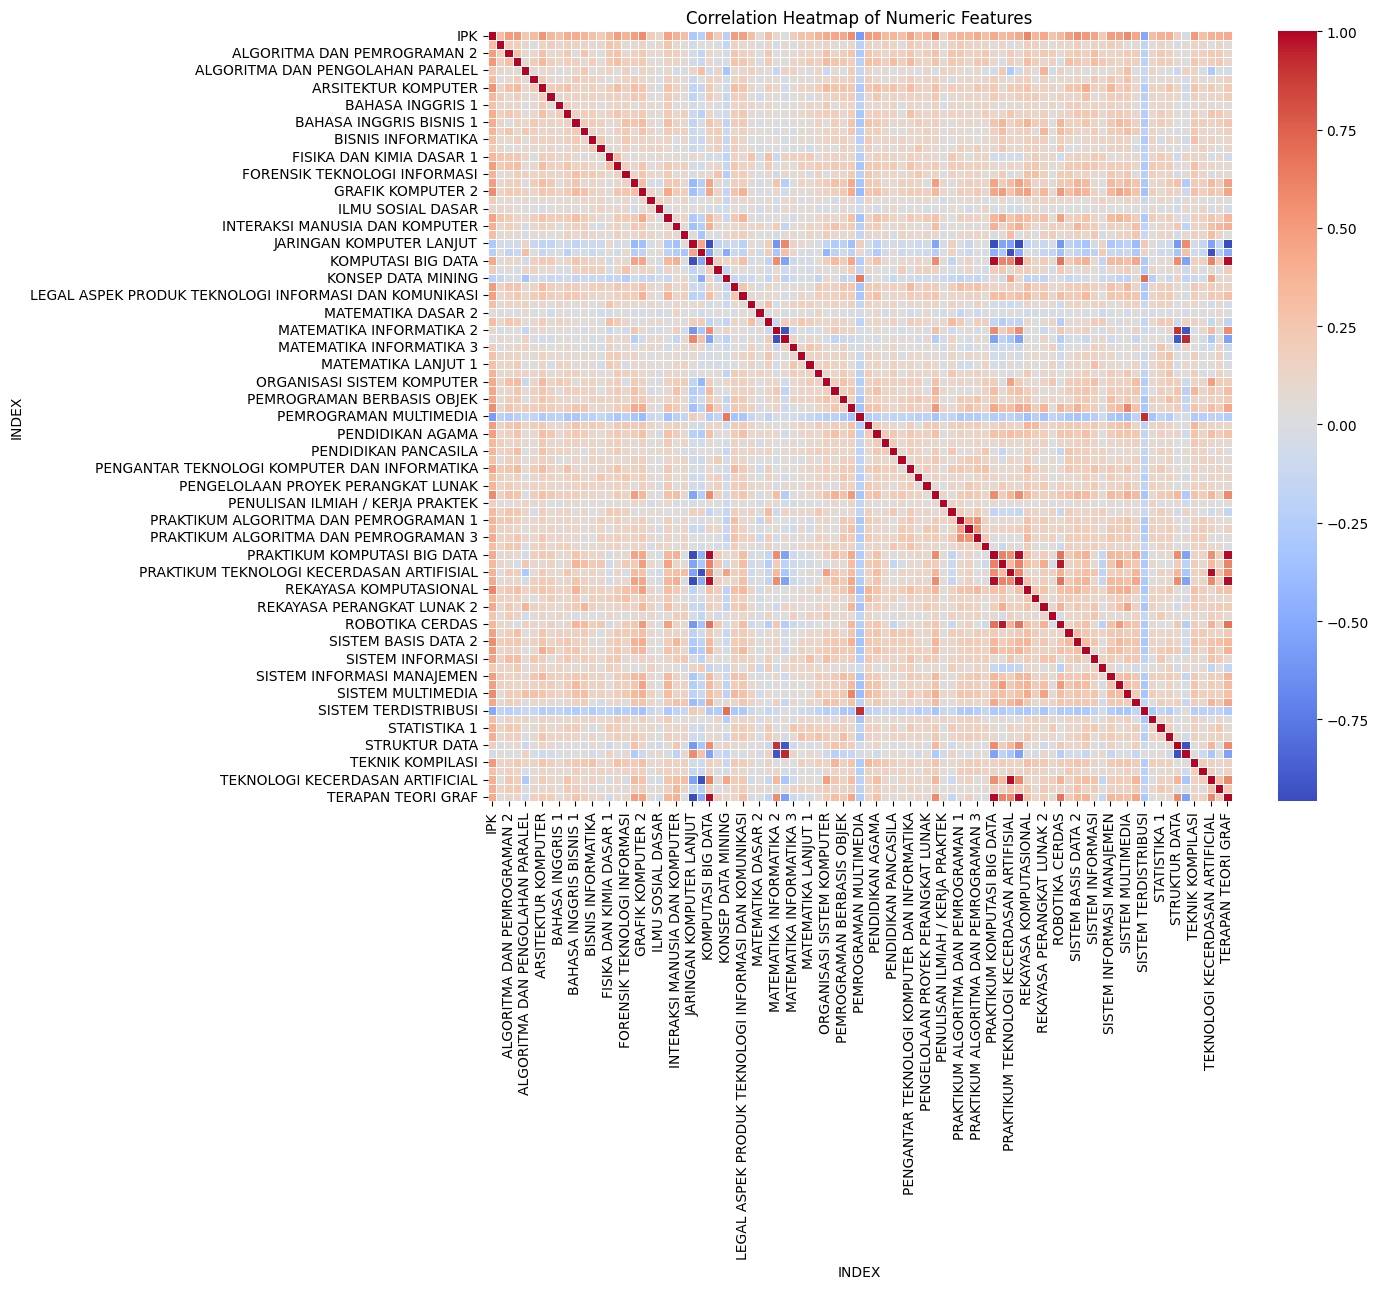

In [225]:
# Select only numeric columns
numeric_columns = pivoted_grades_filled.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix using only numeric columns
correlation_matrix = pivoted_grades_filled[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [226]:
# Let's find the top correlations by unstacking the correlation matrix
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Filter the top correlations (above 0.8) to find significant relationships
significant_correlations = top_correlations[(top_correlations > 0.8) & (top_correlations < 1.0)]

significant_correlations.head(10)

INDEX                                      INDEX                          
PRAKTIKUM TEKNOLOGI KECERDASAN ARTIFISIAL  TEKNOLOGI KECERDASAN ARTIFICIAL    0.992229
TERAPAN TEORI GRAF                         PRAKTIKUM TERAPAN TEORI GRAF       0.992162
                                           PRAKTIKUM KOMPUTASI BIG DATA       0.986782
PRAKTIKUM KOMPUTASI BIG DATA               KOMPUTASI BIG DATA                 0.985544
PRAKTIKUM TERAPAN TEORI GRAF               PRAKTIKUM KOMPUTASI BIG DATA       0.985385
KOMPUTASI BIG DATA                         TERAPAN TEORI GRAF                 0.985067
PRAKTIKUM TERAPAN TEORI GRAF               KOMPUTASI BIG DATA                 0.981700
ROBOTIKA CERDAS                            PRAKTIKUM ROBOTIKA CERDAS          0.969285
MATEMATIKA INFORMATIKA 2                   STRUKTUR DATA                      0.938351
PEMROGRAMAN MULTIMEDIA                     SISTEM TERDISTRIBUSI               0.921168
dtype: float64

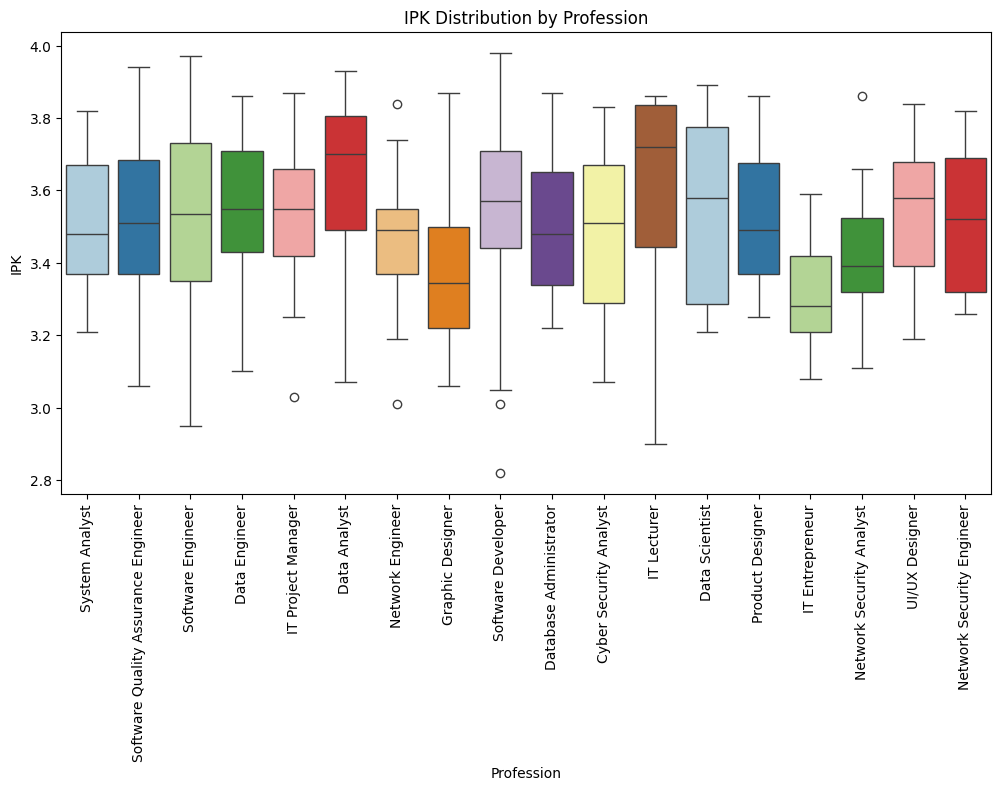

In [227]:
# Create a boxplot to show the distribution of IPK by profession
plt.figure(figsize=(12, 6))
sns.boxplot(x='PROFESI PEKERJAAN', y='IPK', data=pivoted_grades_filled, palette='Paired')
plt.xticks(rotation=90)
plt.title('IPK Distribution by Profession')
plt.ylabel('IPK')
plt.xlabel('Profession')
plt.show()


In [228]:
pivoted_grades_filled

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,Software Quality Assurance Engineer,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,Software Engineer,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,Software Engineer,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Alumni506,3.70,Software Quality Assurance Engineer,4,3,4,3,3,4,4,...,4,4,4,3,0,4,4,4,4,4
506,Alumni507,3.87,Software Engineer,4,4,4,3,4,4,3,...,4,4,4,4,0,3,4,4,4,4
507,Alumni508,3.62,Software Engineer,4,3,4,4,4,3,3,...,3,3,3,4,0,4,4,0,3,4
508,Alumni509,3.48,System Analyst,4,3,4,4,3,3,3,...,0,3,2,3,0,2,4,4,4,4


## Modeling WGAN

In [229]:
# One-hot encode the profession
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'Klasifikasi Profesi' is your target label (profession)
label_encoder = LabelEncoder()
pivoted_grades_filled['Profesi_Encoded'] = label_encoder.fit_transform(pivoted_grades_filled['PROFESI PEKERJAAN'])

# Select the features for prediction (e.g., IPK and scores)
X = pivoted_grades_filled.drop(['ID', 'PROFESI PEKERJAAN', 'Profesi_Encoded'], axis=1)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [230]:
X_scaled

array([[ 0.31508969,  0.79048397, -0.76564957, ..., -0.44356768,
        -0.66855545, -0.7848373 ],
       [ 0.05100466,  0.79048397, -0.76564957, ..., -0.44356768,
        -0.66855545, -0.7848373 ],
       [-1.04934965,  0.79048397, -0.76564957, ..., -0.44356768,
        -0.66855545, -0.7848373 ],
       ...,
       [ 0.35910386,  0.79048397, -0.76564957, ..., -0.44356768,
        -0.66855545,  1.33297763],
       [-0.25709455,  0.79048397, -0.76564957, ...,  2.34926584,
         1.10729496,  1.33297763],
       [ 0.71121724,  0.79048397,  1.20647812, ...,  2.34926584,
        -0.66855545,  1.33297763]])

In [231]:
# check numbers of features in datasets
num_features = pivoted_grades_filled.shape[1] - 4
print(num_features)

88


In [232]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import random
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [233]:
# Set a random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [234]:
# Define the Generator model
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.net(x)

# Define the Critic (Discriminator) model
class Critic(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, x):
        return self.net(x)

In [235]:
# Hyperparameters
input_size = 128  # Size of the latent vector (noise)
hidden_size = 256
output_size = 88  # Number of features from the dataset (excluding the target variable)
batch_size = 128
epochs = 2500
critic_iterations = 5
weight_clipping_limit = 0.01
lr = 0.00001
seed = 42  # Manual seed

In [236]:
# Set manual seed for reproducibility
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

In [237]:
# Load the dataset
data = X_scaled
X_train_data = data[:, :-1]  # Features
X_train_data = torch.tensor(X_train_data, dtype=torch.float32)

# Split the data into training (80%) and validation (20%)
train_data, val_data = train_test_split(X_train_data, test_size=0.2, random_state=seed)

# Convert validation data to torch tensor
val_data = torch.tensor(val_data, dtype=torch.float32)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate models
generator = Generator(input_size, hidden_size, output_size).to(device)
critic = Critic(output_size, hidden_size).to(device)

# Define optimizers
optimizer_G = optim.AdamW(generator.parameters(), lr=lr)
optimizer_C = optim.AdamW(critic.parameters(), lr=lr)

# List to store loss values
losses_G = []
losses_C = []

# List to store evaluation metrics
mse_values = []
wasserstein_values = []
val_mse_values = []  # Store validation MSE

# Training loop
for epoch in range(epochs):
    for _ in range(critic_iterations):
        # Train the critic
        optimizer_C.zero_grad()

        # Sample real data from training data
        real_data = train_data[torch.randint(0, train_data.size(0), (batch_size,))].to(device)

        # Sample noise and generate fake data
        noise = torch.randn(batch_size, input_size).to(device)
        fake_data = generator(noise)

        # Compute critic loss
        critic_real = critic(real_data)
        critic_fake = critic(fake_data.detach())
        loss_C = -(torch.mean(critic_real) - torch.mean(critic_fake))

        # Backpropagation and optimization for the critic
        loss_C.backward()
        optimizer_C.step()

        # Weight clipping for the critic
        for p in critic.parameters():
            p.data.clamp_(-weight_clipping_limit, weight_clipping_limit)

    # Train the generator
    optimizer_G.zero_grad()

    # Generate fake data
    noise = torch.randn(batch_size, input_size).to(device)
    fake_data = generator(noise)

    # Compute generator loss
    loss_G = -torch.mean(critic(fake_data))

    # Backpropagation and optimization for the generator
    loss_G.backward()
    optimizer_G.step()

    # Compute Mean Squared Error (MSE) between real and fake data
    mse = F.mse_loss(fake_data, real_data)
    mse_values.append(mse.item())

    # Validate the generator performance using validation data
    with torch.no_grad():
        val_real_data = val_data[torch.randint(0, val_data.size(0), (batch_size,))].to(device)
        val_fake_data = generator(torch.randn(batch_size, input_size).to(device))
        val_mse = F.mse_loss(val_fake_data, val_real_data)
        val_mse_values.append(val_mse.item())

    # Wasserstein distance (just use the critic loss for the real and fake data)
    wasserstein_distance = torch.mean(critic_real) - torch.mean(critic_fake)
    wasserstein_values.append(wasserstein_distance.item())

    # Store losses for visualization
    losses_G.append(loss_G.item())
    losses_C.append(loss_C.item())

    # Print loss and metrics values every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss C: {loss_C.item()}, Loss G: {loss_G.item()}, MSE: {mse.item()}, 'f'Val MSE: {val_mse.item()}, Wasserstein: {wasserstein_distance.item()}')

Epoch [0/2500], Loss C: -0.00032196473330259323, Loss G: 0.010909372009336948, MSE: 1.0173895359039307, Val MSE: 1.0979102849960327, Wasserstein: 0.00032196473330259323
Epoch [100/2500], Loss C: -0.0016529802232980728, Loss G: 0.012469301000237465, MSE: 1.0592842102050781, Val MSE: 1.0969676971435547, Wasserstein: 0.0016529802232980728
Epoch [200/2500], Loss C: 0.0009512361139059067, Loss G: 0.009173298254609108, MSE: 1.0013172626495361, Val MSE: 1.0765990018844604, Wasserstein: -0.0009512361139059067
Epoch [300/2500], Loss C: -6.923452019691467e-05, Loss G: 0.0061126877553761005, MSE: 1.0150564908981323, Val MSE: 1.089308738708496, Wasserstein: 6.923452019691467e-05
Epoch [400/2500], Loss C: -0.0008484367281198502, Loss G: 0.0100654736161232, MSE: 1.0523719787597656, Val MSE: 1.1287901401519775, Wasserstein: 0.0008484367281198502
Epoch [500/2500], Loss C: -0.0023410245776176453, Loss G: 0.013722611591219902, MSE: 1.0101333856582642, Val MSE: 1.077582597732544, Wasserstein: 0.002341024

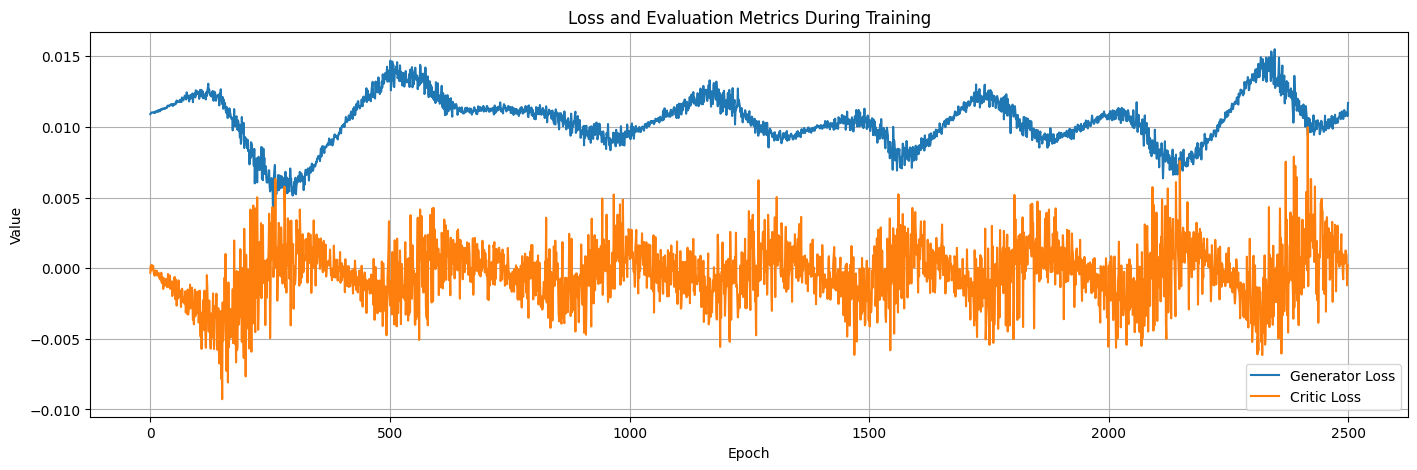

In [238]:
# Plot the losses and evaluation metrics
plt.figure(figsize=(17,5))
plt.title("Loss and Evaluation Metrics During Training")
plt.plot(losses_G, label="Generator Loss")
plt.plot(losses_C, label="Critic Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

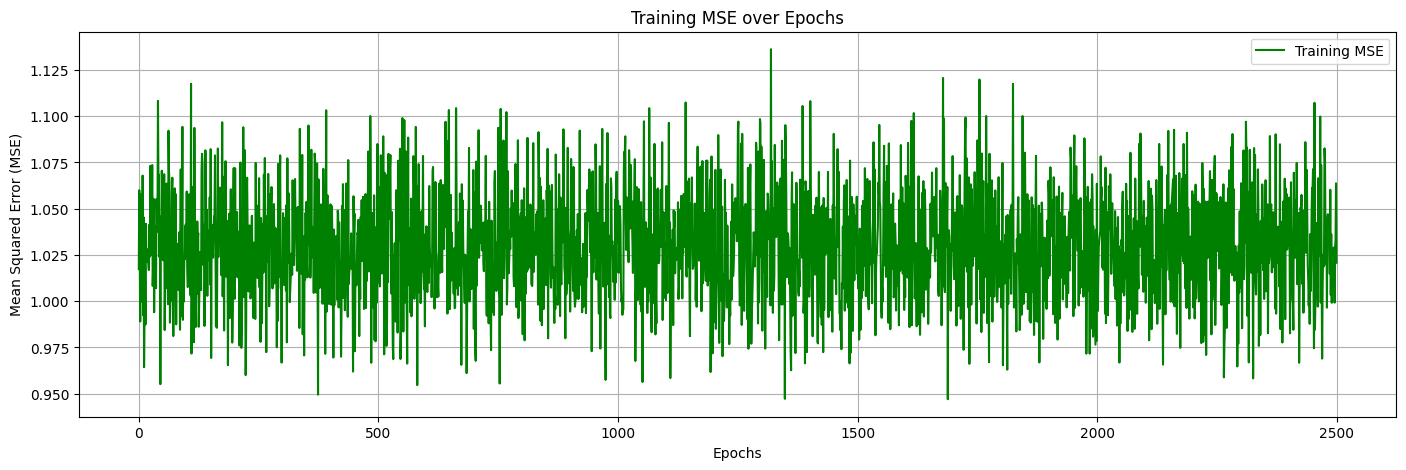

In [239]:
plt.figure(figsize=(17,5))
plt.plot( mse_values, label='Training MSE', color='green')
plt.title('Training MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

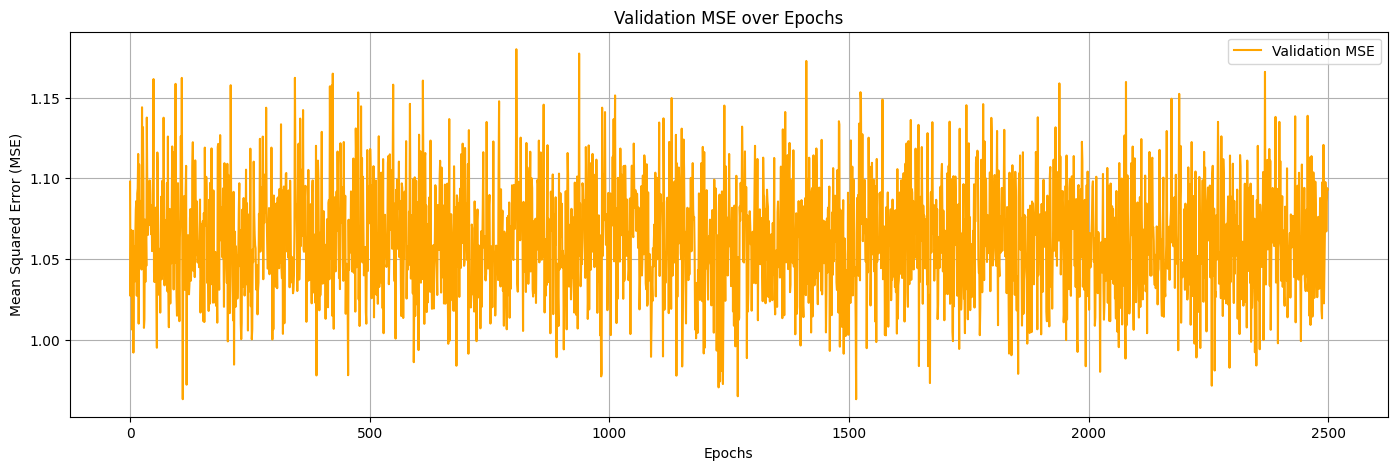

In [240]:
# Plot Validation MSE values
plt.figure(figsize=(17,5))
plt.plot(val_mse_values, label='Validation MSE', color='orange')
plt.title('Validation MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()


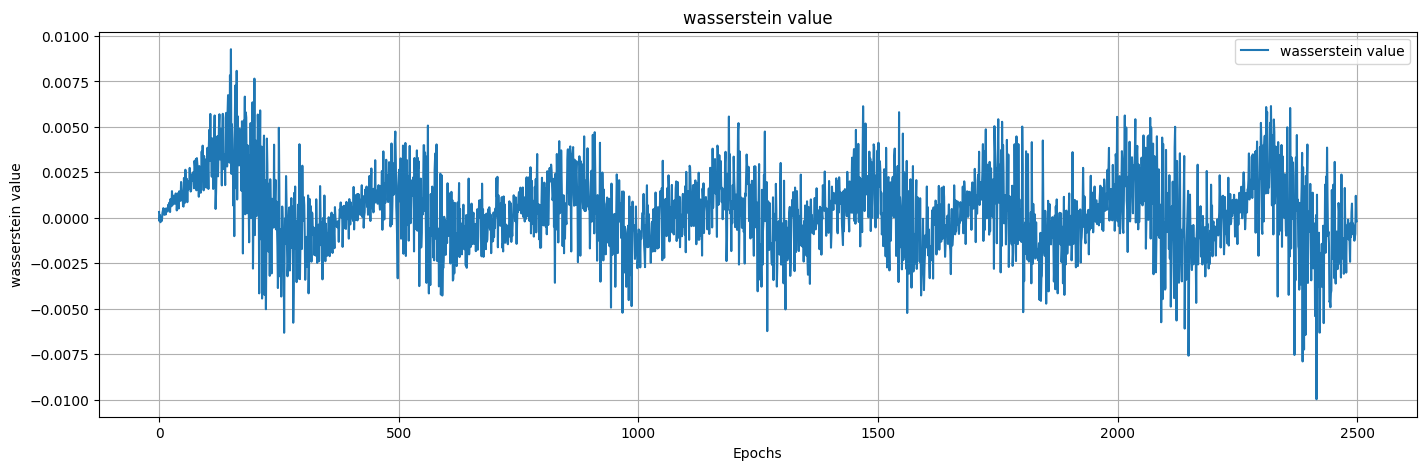

In [244]:
# Plot Wasserstein value
plt.figure(figsize=(17,5))
plt.plot(wasserstein_values, label='wasserstein value')
plt.title('wasserstein value')
plt.xlabel('Epochs')
plt.ylabel('wasserstein value')
plt.grid(True)
plt.legend()
plt.show()

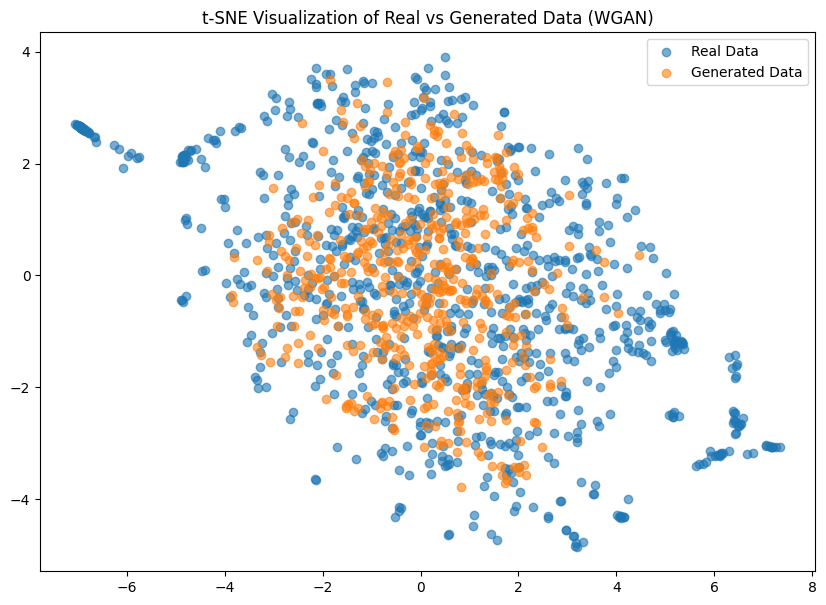

In [245]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_data.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results
plt.figure(figsize=(10,7))
plt.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], label="Real Data", alpha=0.6)
plt.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], label="Generated Data", alpha=0.6)
plt.title("t-SNE Visualization of Real vs Generated Data (WGAN)")
plt.legend()
plt.show()


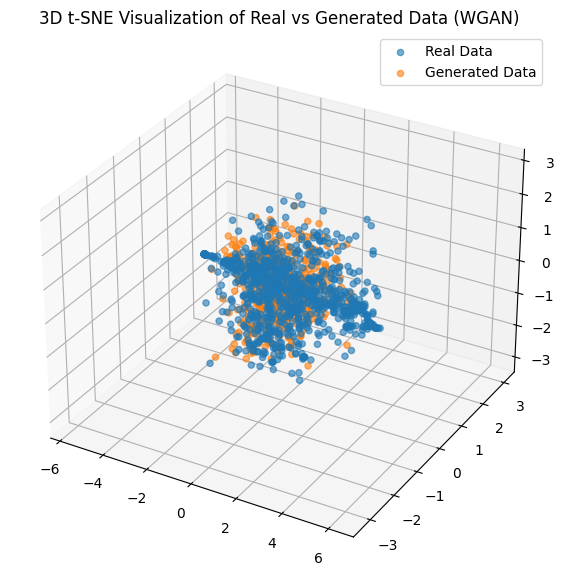

In [246]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_data.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], tsne_results[:1000, 2], label="Real Data", alpha=0.6)
ax.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], tsne_results[1000:, 2], label="Generated Data", alpha=0.6)
ax.set_title("3D t-SNE Visualization of Real vs Generated Data (WGAN)")
ax.legend()
plt.show()


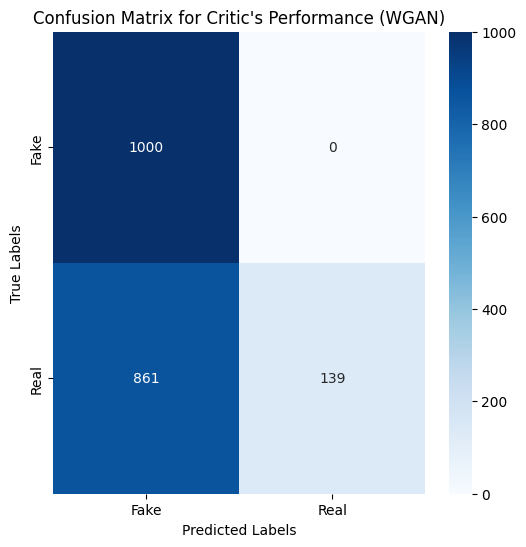

In [250]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch.nn.functional as F

# Number of samples for evaluation
n_samples = 1000

# Generate real and fake data for evaluation
real_data = X_train_data[torch.randint(0, X_train_data.size(0), (n_samples,))].to(device)
noise = torch.randn(n_samples, input_size).to(device)
fake_data = generator(noise)

# Critic predictions
critic_real = critic(real_data)
critic_fake = critic(fake_data)

# Threshold the Critic output to get binary labels (1 for real, 0 for fake)
pred_real = (critic_real >= 0).float().cpu().numpy()  # Predicted labels for real data
pred_fake = (critic_fake >= 0).float().cpu().numpy()  # Predicted labels for fake data

# Actual labels
true_real = np.ones(n_samples)  # True labels for real data (1)
true_fake = np.zeros(n_samples)  # True labels for fake data (0)

# Combine the labels
true_labels = np.concatenate([true_real, true_fake])
pred_labels = np.concatenate([pred_real, pred_fake])

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Critic's Performance (WGAN)")
plt.show()

## Modelling WGAN-GP

In [251]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import AdamW
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Preprocessing

In [252]:
# One-hot encode the profession
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'Klasifikasi Profesi' is your target label (profession)
label_encoder = LabelEncoder()
pivoted_grades_filled['Profesi_Encoded'] = label_encoder.fit_transform(pivoted_grades_filled['PROFESI PEKERJAAN'])

# Select the features for prediction (e.g., IPK and scores)
X = pivoted_grades_filled.drop(['ID', 'PROFESI PEKERJAAN', 'Profesi_Encoded'], axis=1)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Define Generator and Critic (Discriminator) Models

In [253]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.net(x)


class Critic(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, x):
        return self.net(x)


## Gradient Penalty Function

In [254]:
def compute_gradient_penalty(critic, real_samples, fake_samples):
    alpha = torch.rand((real_samples.size(0), 1), device=device)
    alpha = alpha.expand_as(real_samples)

    # Interpolate between real and fake data
    interpolates = alpha * real_samples + (1 - alpha) * fake_samples
    interpolates = interpolates.requires_grad_(True)

    critic_interpolates = critic(interpolates)

    gradients = grad(
        outputs=critic_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(critic_interpolates),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


## Hyperparameters and Initial Setup

In [255]:
# Hyperparameters
input_size = 128  # Size of the noise vector
hidden_size = 256
output_size = 88  # Number of features in the dataset (exclude the target column)
lr = 0.00001  # Learning rate
batch_size = 128
n_epochs = 2500
n_critic = 5  # Critic steps per generator step
lambda_gp = 10  # Weight for gradient penalty
seed = 42  # Manual seed for reproducibility

# Set manual random seed for reproducibility
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

# Load and split data (80% train, 20% validation)
data = X_scaled
X_train_data = data[:, :-1]  # Features
X_train_data = torch.tensor(X_train_data, dtype=torch.float32)

# Train-validation split
train_data, val_data = train_test_split(X_train_data, test_size=0.2, random_state=seed)

# Convert validation data to PyTorch tensor
val_data = torch.tensor(val_data, dtype=torch.float32)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate models
generator = Generator(input_size, hidden_size, output_size).to(device)
critic = Critic(output_size, hidden_size).to(device)

# Optimizers
optimizer_G = AdamW(generator.parameters(), lr=lr, betas=(0.5, 0.9), weight_decay=1e-4)
optimizer_C = AdamW(critic.parameters(), lr=lr, betas=(0.5, 0.9), weight_decay=1e-4)

## Training Loop

In [256]:
# Hyperparameters for early stopping
patience = 1000  # Number of epochs to wait for improvement
min_delta = 0.001  # Minimum change in the monitored loss to qualify as improvement
best_loss = float('inf')  # Initialize best loss with a very large number
early_stop_counter = 0  # Counter to track patience

In [257]:
# Training loop with early stopping
critic_losses = []
generator_losses = []

# Lists to store evaluation metrics
mse_values = []
wasserstein_values = []
val_mse_values = []  # To store validation MSE for tracking performance

for epoch in range(n_epochs):
    for _ in range(n_critic):
        # Train the critic
        real_samples = train_data[torch.randint(0, train_data.size(0), (batch_size,))].to(device)
        latent_space_samples = torch.randn((batch_size, input_size)).to(device)
        fake_samples = generator(latent_space_samples).detach()

        critic_real = critic(real_samples)
        critic_fake = critic(fake_samples)

        # Compute Wasserstein distance
        wasserstein_distance = torch.mean(critic_real) - torch.mean(critic_fake)

        # Compute gradient penalty
        gradient_penalty = compute_gradient_penalty(critic, real_samples, fake_samples)
        loss_critic = -wasserstein_distance + lambda_gp * gradient_penalty

        optimizer_C.zero_grad()
        loss_critic.backward()
        optimizer_C.step()

    # Train the generator
    latent_space_samples = torch.randn((batch_size, input_size)).to(device)
    fake_samples = generator(latent_space_samples)
    loss_generator = -torch.mean(critic(fake_samples))

    optimizer_G.zero_grad()
    loss_generator.backward()
    optimizer_G.step()

    # Store losses
    critic_losses.append(loss_critic.item())
    generator_losses.append(loss_generator.item())

    # Compute MSE between real and fake data (training set)
    mse = torch.mean((fake_samples - real_samples) ** 2).item()
    mse_values.append(mse)

    # Compute Wasserstein distance
    wasserstein_values.append(wasserstein_distance.item())

    # Validation step: Use validation data to calculate MSE
    with torch.no_grad():
        val_real_samples = val_data[torch.randint(0, val_data.size(0), (batch_size,))].to(device)
        val_latent_space_samples = torch.randn((batch_size, input_size)).to(device)
        val_fake_samples = generator(val_latent_space_samples)
        val_mse = torch.mean((val_fake_samples - val_real_samples) ** 2).item()
        val_mse_values.append(val_mse)

    # Check for early stopping
    if loss_generator.item() < best_loss - min_delta:
        best_loss = loss_generator.item()  # Update best loss
        early_stop_counter = 0  # Reset counter if improvement
        # Optionally save the best model
        # torch.save(generator.state_dict(), "best_generator.pth")
        # torch.save(critic.state_dict(), "best_critic.pth")
    else:
        early_stop_counter += 1  # Increment the counter

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break  # Stop training if patience is exceeded

    # Print losses occasionally
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{n_epochs}] | Critic Loss: {loss_critic.item()} | Generator Loss: {loss_generator.item()} | "f"Train MSE: {mse} | Val MSE: {val_mse} | Wasserstein Distance: {wasserstein_distance.item()}")


Epoch [0/2500] | Critic Loss: 6.112534999847412 | Generator Loss: 0.01531958393752575 | Train MSE: 1.0173895359039307 | Val MSE: 1.097904920578003 | Wasserstein Distance: 0.015091837383806705
Epoch [100/2500] | Critic Loss: 0.1311485767364502 | Generator Loss: -0.12305386364459991 | Train MSE: 1.0600336790084839 | Val MSE: 1.0972731113433838 | Wasserstein Distance: -0.1310729831457138
Epoch [200/2500] | Critic Loss: 0.04645196720957756 | Generator Loss: -0.031756870448589325 | Train MSE: 1.002554178237915 | Val MSE: 1.075213074684143 | Wasserstein Distance: -0.04642708972096443
Epoch [300/2500] | Critic Loss: -0.27383914589881897 | Generator Loss: 0.09092308580875397 | Train MSE: 1.0154792070388794 | Val MSE: 1.0862566232681274 | Wasserstein Distance: 0.27428674697875977
Epoch [400/2500] | Critic Loss: -0.2014109492301941 | Generator Loss: 0.19210325181484222 | Train MSE: 1.0521925687789917 | Val MSE: 1.1275298595428467 | Wasserstein Distance: 0.202034592628479
Epoch [500/2500] | Criti

## Model Post Viz

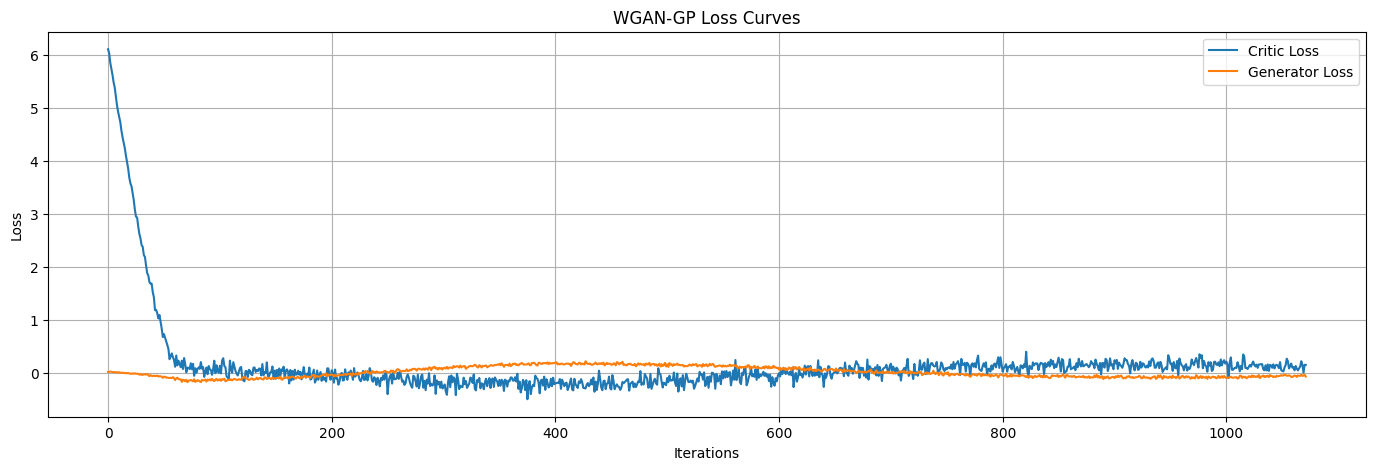

In [258]:
# Plot the loss curves
plt.figure(figsize=(17,5))
plt.plot(critic_losses, label="Critic Loss")
plt.plot(generator_losses, label="Generator Loss")
plt.title("WGAN-GP Loss Curves")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


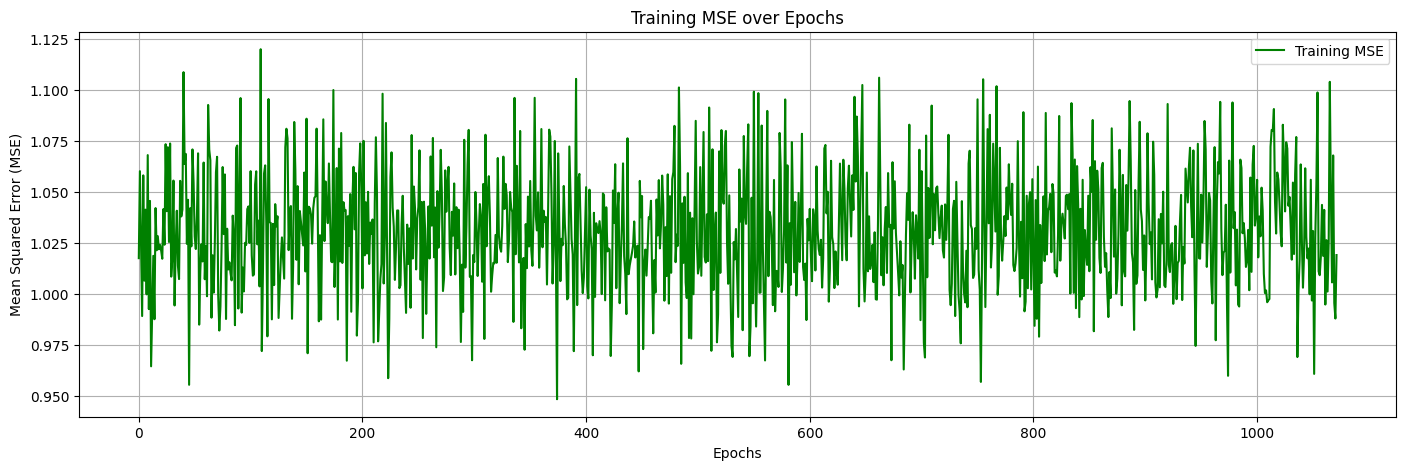

In [259]:
plt.figure(figsize=(17,5))
plt.plot( mse_values, label='Training MSE', color='green')
plt.title('Training MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()

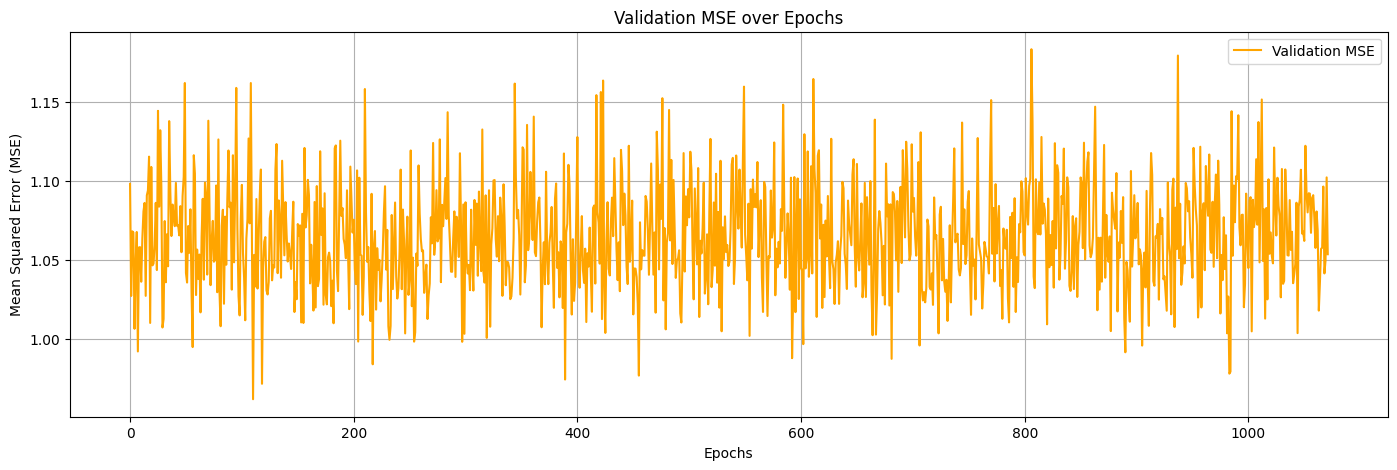

In [260]:
# Plot Validation MSE values
plt.figure(figsize=(17,5))
plt.plot(val_mse_values, label='Validation MSE', color='orange')
plt.title('Validation MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()


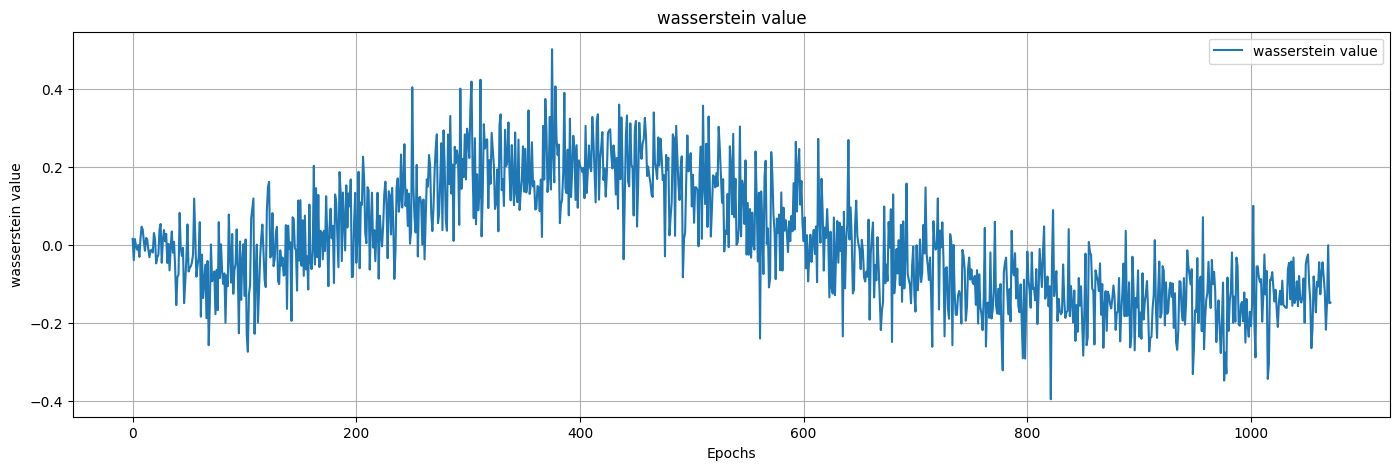

In [261]:
# Plot wasserstein value
plt.figure(figsize=(17,5))
plt.plot(wasserstein_values, label='wasserstein value')
plt.title('wasserstein value')
plt.xlabel('Epochs')
plt.ylabel('wasserstein value')
plt.grid(True)
plt.legend()
plt.show()

## Visualizing Real vs Generated Data with t-SNE

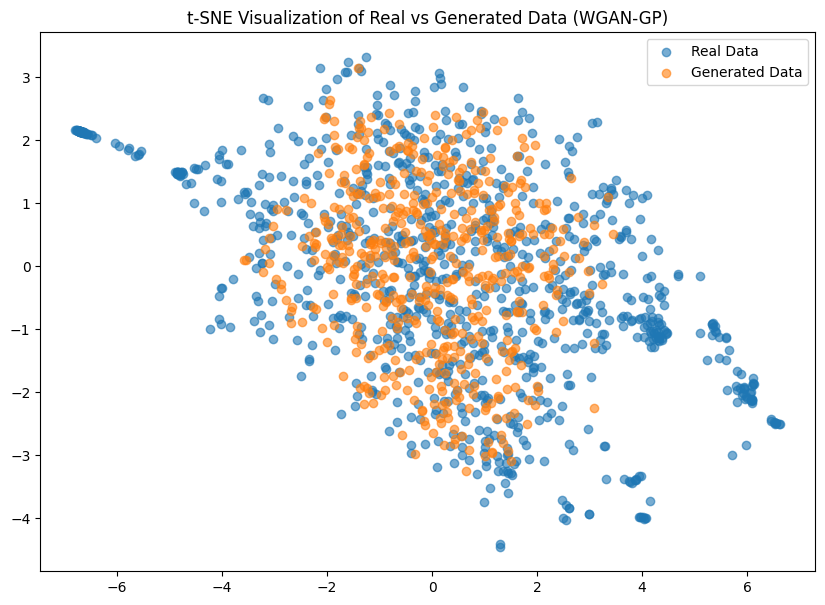

In [262]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_data.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results
plt.figure(figsize=(10,7))
plt.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], label="Real Data", alpha=0.6)
plt.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], label="Generated Data", alpha=0.6)
plt.title("t-SNE Visualization of Real vs Generated Data (WGAN-GP)")
plt.legend()
plt.show()


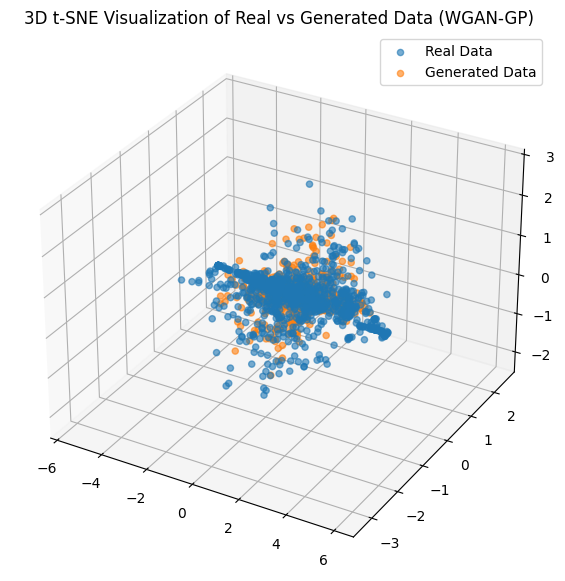

In [263]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train_data.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], tsne_results[:1000, 2], label="Real Data", alpha=0.6)
ax.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], tsne_results[1000:, 2], label="Generated Data", alpha=0.6)
ax.set_title("3D t-SNE Visualization of Real vs Generated Data (WGAN-GP)")
ax.legend()
plt.show()


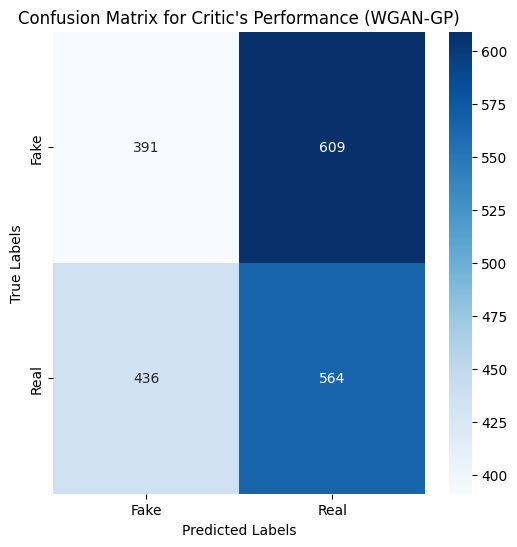

In [264]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch.nn.functional as F

# Number of samples for evaluation
n_samples = 1000

# Generate real and fake data for evaluation
real_data = X_train_data[torch.randint(0, X_train_data.size(0), (n_samples,))].to(device)
noise = torch.randn(n_samples, input_size).to(device)
fake_data = generator(noise)

# Critic predictions
critic_real = critic(real_data)
critic_fake = critic(fake_data)

# Threshold the Critic output to get binary labels (1 for real, 0 for fake)
pred_real = (critic_real >= 0).float().cpu().numpy()  # Predicted labels for real data
pred_fake = (critic_fake >= 0).float().cpu().numpy()  # Predicted labels for fake data

# Actual labels
true_real = np.ones(n_samples)  # True labels for real data (1)
true_fake = np.zeros(n_samples)  # True labels for fake data (0)

# Combine the labels
true_labels = np.concatenate([true_real, true_fake])
pred_labels = np.concatenate([pred_real, pred_fake])

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Critic's Performance (WGAN-GP)")
plt.show()

In [ ]:
# Load the best saved model
generator.load_state_dict(torch.load("best_generator.pth"))
critic.load_state_dict(torch.load("best_critic.pth"))

## Model Deployment